In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_regression

In [76]:
df = pd.read_csv('../data/final_eda_base_data.csv', index_col= 0)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [78]:
#df.drop(df.iloc[:, 22:40], inplace = True, axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [ ]:
#Drop some highly correlated columns - 
#'no_of_sales_12M_10K' , 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M'
#'no_of_fund_sales_12M_10K'

In [232]:
X = df.drop(['no_of_sales_12M_10K', 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M','no_of_fund_sales_12M_10K'], axis=1, inplace= True)

In [233]:
##Prepare the test train split

In [234]:
X = df.drop(['sales_2019', 'new_fund_2019','Firm name'], axis=1)
y = df['sales_2019']

In [235]:
X = (X-X.mean())/X.std()

In [236]:
#draw histogram to see the distribution

In [237]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_funds_sold_12M_1               10005 non-null  float64
 3   no_of_funds_redeemed_12M_1           10005 non-null  float64
 4   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 5   no_of_assetclass_sold_12M_1          10005 non-null  float64
 6   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 7   no_of_assetclass_Redemption_12M_10K  10005 non-null  float64
 8   No_of_fund_curr                      10005 non-null  float64
 9   No_of_asset_curr                     10005 non-null  float64
 10  AUM                                  10005 non-null  float64
 11  sales_curr                  

In [238]:
## Decreasing the random state to 12 yeilds a better performance - .50 score on Test data

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

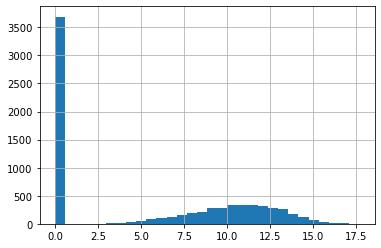

In [240]:
np.log1p(y_train).hist(bins=30);

In [241]:
pred_baseline = np.ones(len(y_train))*np.mean(y_train)

In [242]:
r2_score(y_train, pred_baseline)

0.0

In [243]:
mean_squared_error(y_train, pred_baseline, squared= False)

1185311.8594254837

In [344]:
lr_pipeline = make_pipeline(PCA(0.8), LinearRegression())

In [345]:
X_train.describe()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
count,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,...,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000
mean,0.003349,0.006208,-0.001315,-0.000869,0.002350,-0.003570,-0.005516,-0.000658,-0.002991,-0.001158,...,0.003019,0.006211,0.003783,-0.009620,0.005775,-0.001061,-0.000583,0.005775,0.005252,-0.003331
std,1.070637,1.139727,1.000704,1.004148,1.003367,1.000310,0.999332,1.001887,0.994794,0.999885,...,1.044483,1.043123,1.069063,0.666767,1.154720,1.000393,0.999773,1.154720,1.017021,0.957555
min,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,-1.417010,-0.666092,-0.017318,-0.149588,-0.040020
25%,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,-1.417010,-0.666092,-0.017318,-0.149588,-0.040020
50%,-0.204003,-0.104287,-0.571424,-0.220574,-0.447401,-0.782473,0.089085,-0.565465,-0.364770,0.076709,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.040020
75%,-0.122736,-0.067744,0.268955,0.184649,0.288582,0.212778,1.044390,0.773900,0.272869,0.076709,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,1.501144,-0.017318,-0.149588,-0.040020
max,44.442297,63.330306,12.874634,12.746562,14.272259,4.193782,3.910305,4.791998,9.518632,4.873396,...,30.140581,14.253539,37.790779,57.737914,57.737914,0.705641,1.501144,57.737914,6.684345,24.984997


In [346]:
#Drop some highly correlated columns - 
#'no_of_sales_12M_10K' , 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M'
#'no_of_fund_sales_12M_10K'


In [347]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 6967 to 4367
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    7503 non-null   float64
 1   no_of_Redemption_12M_1               7503 non-null   float64
 2   no_of_funds_sold_12M_1               7503 non-null   float64
 3   no_of_funds_redeemed_12M_1           7503 non-null   float64
 4   no_of_funds_Redemption_12M_10K       7503 non-null   float64
 5   no_of_assetclass_sold_12M_1          7503 non-null   float64
 6   no_of_assetclass_redeemed_12M_1      7503 non-null   float64
 7   no_of_assetclass_Redemption_12M_10K  7503 non-null   float64
 8   No_of_fund_curr                      7503 non-null   float64
 9   No_of_asset_curr                     7503 non-null   float64
 10  AUM                                  7503 non-null   float64
 11  sales_curr                 

In [348]:
X_train.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
6967,-0.193845,-0.109508,-0.151235,-0.625797,-0.447401,0.212778,-0.866220,-0.565465,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.04002
2294,0.832157,0.459529,0.268955,0.184649,1.024565,1.208029,1.044390,2.113266,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.04002
5251,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.04002
4489,0.060116,-0.104287,0.268955,-0.220574,0.288582,0.212778,0.089085,0.773900,1.229327,2.954721,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,-1.417010,1.501144,-0.017318,-0.149588,-0.04002
5374,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.04002


In [349]:
##Write the X_train to a CSV for easy comparison

In [350]:
X_train.to_excel('../data/X_train-for-comparison.xlsx')

In [351]:
## Selecting K best columns in X_train

In [352]:
X_new = SelectKBest(f_regression, k =16).fit_transform(X_train, y_train)

In [353]:
#Convert Numpy array to pandas DataFrame to analyze better

In [354]:
df_X_new = pd.DataFrame(X_new)

In [355]:
df_X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.193845,-0.109508,-0.151235,-0.625797,-0.447401,0.212778,-0.866220,-0.565465,-0.683590,-0.882629,-0.162021,-0.089097,-0.153225,0.094081,0.423093,-0.033175
1,0.832157,0.459529,0.268955,0.184649,1.024565,1.208029,1.044390,2.113266,-0.683590,-0.882629,-0.162021,-0.089097,-0.020252,0.094126,0.423093,-0.033175
2,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,-0.162021,-0.089097,-0.153233,0.094126,-0.410676,-0.033175
3,0.060116,-0.104287,0.268955,-0.220574,0.288582,0.212778,0.089085,0.773900,1.229327,2.954721,-0.100798,-0.087057,-0.148676,0.094126,0.423093,-0.033175
4,-0.204003,-0.109508,-0.571424,-0.625797,-0.447401,-0.782473,-0.866220,-0.565465,-0.683590,-0.882629,-0.162021,-0.089097,-0.153233,0.094126,-0.410676,-0.033175


## These are the 16 best features as per SelectKBest 
no_of_sales_12M_1 -0.193845 0
no_of_Redemption_12M_1 -0.109508 1
no_of_funds_sold_12M_1 -0.151235 2

no_of_funds_redeemed_12M_1, (-0.625797) 3
no_of_funds_Redemption_12M_10K (-0.447401) 4 # not required as both above are co-related
no_of_assetclass_sold_12M_1 0.212778 5

no_of_assetclass_redeemed_12M_1 -0.866220 6
no_of_assetclass_Redemption_12M_10K  -0.565465 7 # not required as co-related
No_of_fund_curr -0.683590 8

No_of_asset_curr -0.882629 9
AUM,-0.162021 10
sales_curr,	  -0.089097 11

sales_12M,    -0.153225 12
redemption_curr,  0.094081 13
new_Fund_added_12M 0.423093 14

Channel_Networker -0.033175 15

In [356]:
## Evaluate model performance for only the select columns from selectkbest suggestion to see if the score increases

In [357]:
df_X_train_selectKbest = X_train[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                  'No_of_fund_curr','No_of_asset_curr',  'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [358]:
df_X_train_selectKbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 6967 to 4367
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   no_of_sales_12M_1                7503 non-null   float64
 1   no_of_Redemption_12M_1           7503 non-null   float64
 2   no_of_funds_sold_12M_1           7503 non-null   float64
 3   no_of_funds_redeemed_12M_1       7503 non-null   float64
 4   no_of_assetclass_sold_12M_1      7503 non-null   float64
 5   no_of_assetclass_redeemed_12M_1  7503 non-null   float64
 6   No_of_fund_curr                  7503 non-null   float64
 7   No_of_asset_curr                 7503 non-null   float64
 8   AUM                              7503 non-null   float64
 9   sales_curr                       7503 non-null   float64
 10  sales_12M                        7503 non-null   float64
 11  redemption_curr                  7503 non-null   float64
dtypes: float64(12)
me

In [359]:
df_X_test_selectKbest = X_test[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                   'No_of_fund_curr','No_of_asset_curr', 'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [360]:
lr_pipeline.fit(df_X_train_selectKbest, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [361]:
lr_pipeline.score(df_X_train_selectKbest, y_train)

0.492265467961968

In [362]:
lr_pipeline.score(df_X_test_selectKbest, y_test)

0.49472724532190926

In [363]:
### - Model performance with only the features selected from selectkbest is .47 which is very minimal better than .46 without any pre-selection

In [364]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [365]:
lr_pipeline.score(X_train, y_train)

0.49467781162185154

In [366]:
lr_pipeline.score(X_test, y_test)

0.4994005672987373

In [ ]:
## Total number of Principal components to explain a variation of 80%

In [100]:
lr_pipeline.named_steps['pca'].n_components_

16

In [144]:
np_PCA = lr_pipeline.named_steps['pca'].components_

In [147]:
np_PCA

array([[ 1.88872355e-01,  1.42177836e-01,  2.21125030e-01,
         2.09442586e-01,  2.75786137e-01,  2.79369793e-01,
         2.81232817e-01,  2.66785481e-01,  2.54061447e-01,
         2.43954834e-01,  2.61796611e-01,  2.48944558e-01,
         2.48842422e-01,  2.01023013e-01,  1.52393440e-01,
         1.26169778e-01,  1.98912243e-01, -9.30143402e-02,
        -1.91887617e-01,  1.68692520e-01, -1.71762559e-02,
        -1.55889790e-02, -1.02362980e-02, -1.74228671e-02,
        -7.79130638e-03, -6.16124090e-02, -6.82539666e-03,
        -3.53444431e-03,  8.85676570e-02,  6.21149719e-02,
        -6.58323014e-03, -7.23384305e-03, -1.76031666e-03,
        -5.98997920e-03, -9.57767789e-02,  9.47421076e-02,
        -3.39001041e-03, -1.61885143e-03,  5.07188568e-02],
       [ 1.05124674e-01,  1.64667032e-01,  3.34328293e-01,
         3.78991987e-01, -1.48656343e-01, -1.09261293e-01,
        -7.84278432e-02, -2.81998570e-02, -1.90932106e-01,
        -1.64826494e-01, -1.25174944e-01, -9.25588474e-

In [ ]:
## convert the 

In [148]:
df_PCA = pd.DataFrame(np_PCA)

In [149]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.188872,0.142178,0.221125,0.209443,0.275786,0.279370,0.281233,0.266785,0.254061,0.243955,...,0.062115,-0.006583,-0.007234,-0.001760,-0.005990,-0.095777,0.094742,-0.003390,-0.001619,0.050719
1,0.105125,0.164667,0.334328,0.378992,-0.148656,-0.109261,-0.078428,-0.028200,-0.190932,-0.164826,...,0.132577,-0.011875,0.006691,0.001678,0.005629,0.190072,-0.207586,0.018302,0.006932,0.115221
2,-0.022422,0.020495,0.056896,0.076667,-0.153140,-0.116421,-0.094813,-0.051132,-0.133174,-0.112953,...,0.027539,0.083987,0.026177,0.001065,0.045438,-0.463208,0.449069,0.031101,0.055478,0.021498
3,-0.013104,-0.021928,-0.027059,-0.015882,0.019275,0.021721,0.019094,0.028734,0.009053,0.007050,...,0.129378,-0.010930,-0.003184,-0.000247,0.682004,0.007667,-0.050367,0.263228,-0.001101,0.087885
4,-0.152859,-0.170915,-0.130644,-0.034097,-0.009953,0.058386,0.019074,0.144743,-0.018943,0.016064,...,0.644338,0.000329,0.006764,0.000223,-0.187300,-0.032908,-0.015351,0.187524,0.001813,0.553913


In [101]:
y_test_reg_preds = lr_pipeline.predict(X_test)

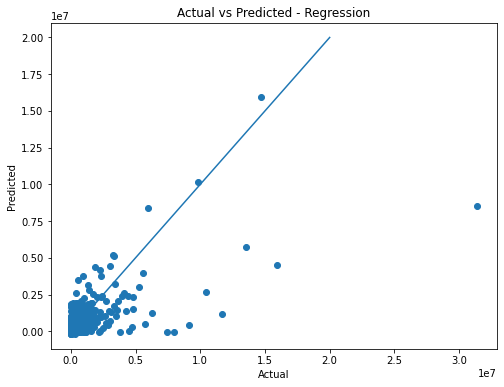

In [102]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test, y=y_test_reg_preds)

axes.plot([0, 20000000], [0,20000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

In [103]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 243 kB 4.7 MB/s eta 0:00:01


  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.10.1
    Uninstalling pandas-profiling-2.10.1:
      Successfully uninstalled pandas-profiling-2.10.1
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [104]:
## Selecting K best columns in X_train